In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
import seaborn as sns

from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

import datetime

C:\ProgramData\miniconda3\envs\dsi-sg\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_east = pd.read_csv('../data/df_east_merge.csv')

In [3]:
df_east

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
0,0,2013,21,East,283,38.6,45.7,33.4,1,28.3,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2013,22,East,278,87.4,38.5,33.1,1,27.7,...,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2,2,2013,23,East,140,177.4,46.1,33.7,1,27.8,...,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
3,3,2013,24,East,446,33.0,87.1,33.6,1,29.7,...,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
4,4,2013,25,East,481,0.2,43.6,34.5,1,30.0,...,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,2020,41,East,140,49.0,52.2,33.2,1,28.1,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
388,388,2020,42,East,140,14.2,51.5,33.6,1,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
389,389,2020,43,East,140,41.8,57.2,33.7,1,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
390,390,2020,44,East,140,47.2,37.8,34.1,1,28.1,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0


In [4]:
df_east['index'] = df_east['yr'] * 100 + df_east['week']
df_east.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff,index
387,387,2020,41,East,140,49.0,52.2,33.2,1,28.1,...,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0,202041
388,388,2020,42,East,140,14.2,51.5,33.6,1,28.8,...,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0,202042
389,389,2020,43,East,140,41.8,57.2,33.7,1,28.2,...,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0,202043
390,390,2020,44,East,140,47.2,37.8,34.1,1,28.1,...,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0,202044
391,391,2020,45,East,619,239.4,45.0,32.7,1,27.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202045


In [5]:
df_east.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 392 non-null    int64  
 1   yr                         392 non-null    int64  
 2   week                       392 non-null    int64  
 3   region                     392 non-null    object 
 4   no_cases                   392 non-null    int64  
 5   total_daily_rainfall       392 non-null    float64
 6   max_wind_sp                392 non-null    float64
 7   max_temp                   392 non-null    float64
 8   rainy_day                  392 non-null    int64  
 9   mean_temp                  392 non-null    float64
 10  mean_wind_sp               392 non-null    float64
 11  min_temp                   392 non-null    float64
 12  dengue_fever               392 non-null    float64
 13  dengue                     392 non-null    float64

In [6]:
# convert the integer column to a datetime index
df_east['index'] = pd.to_datetime(df_east['index'].astype(str) + '-0', format='%Y%W-%w')

In [7]:

df_east = df_east.set_index('index')
df_east.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387,2020,41,East,140,49.0,52.2,33.2,1,28.1,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388,2020,42,East,140,14.2,51.5,33.6,1,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389,2020,43,East,140,41.8,57.2,33.7,1,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390,2020,44,East,140,47.2,37.8,34.1,1,28.1,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391,2020,45,East,619,239.4,45.0,32.7,1,27.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_east = df_east.loc[~df_east.index.duplicated(), :]

In [9]:
df_east.index.is_unique

True

In [10]:
df_east = df_east.asfreq('W')
print(df_east.index.dtype)
df_east.tail()

datetime64[ns]


,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387.0,2020.0,41.0,East,140.0,49.0,52.2,33.2,1.0,28.1,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388.0,2020.0,42.0,East,140.0,14.2,51.5,33.6,1.0,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389.0,2020.0,43.0,East,140.0,41.8,57.2,33.7,1.0,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390.0,2020.0,44.0,East,140.0,47.2,37.8,34.1,1.0,28.1,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391.0,2020.0,45.0,East,619.0,239.4,45.0,32.7,1.0,27.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
missing_values = df_east.isnull()
rows_with_missing_values = missing_values.any(axis=1)
print(df_east[rows_with_missing_values])

            Unnamed: 0  yr  week region  no_cases  total_daily_rainfall  \
index                                                                     
2019-01-06         NaN NaN   NaN    NaN       NaN                   NaN   

            max_wind_sp  max_temp  rainy_day  mean_temp  ...  mosquito  \
index                                                    ...             
2019-01-06          NaN       NaN        NaN        NaN  ...       NaN   

            insect_repellent  dengue_fever_diff  dengue_fever_2nd_diff  \
index                                                                    
2019-01-06               NaN                NaN                    NaN   

            dengue_diff  dengue_2nd_diff  mosquito_diff  mosquito_2nd_diff  \
index                                                                        
2019-01-06          NaN              NaN            NaN                NaN   

            insect_repellent_diff  insect_repellent_2nd_diff  
index                         

In [12]:
df_east = df_east.fillna(method='ffill')

In [13]:
missing_values = df_east.isnull()
rows_with_missing_values = missing_values.any(axis=1)
print(df_east[rows_with_missing_values])

Empty DataFrame
Columns: [Unnamed: 0, yr, week, region, no_cases, total_daily_rainfall, max_wind_sp, max_temp, rainy_day, mean_temp, mean_wind_sp, min_temp, dengue_fever, dengue, mosquito, insect_repellent, dengue_fever_diff, dengue_fever_2nd_diff, dengue_diff, dengue_2nd_diff, mosquito_diff, mosquito_2nd_diff, insect_repellent_diff, insect_repellent_2nd_diff]
Index: []

[0 rows x 24 columns]


In [14]:
df_east = df_east.sort_index()
df_east.tail()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
2020-10-18,387.0,2020.0,41.0,East,140.0,49.0,52.2,33.2,1.0,28.1,...,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
2020-10-25,388.0,2020.0,42.0,East,140.0,14.2,51.5,33.6,1.0,28.8,...,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
2020-11-01,389.0,2020.0,43.0,East,140.0,41.8,57.2,33.7,1.0,28.2,...,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0
2020-11-08,390.0,2020.0,44.0,East,140.0,47.2,37.8,34.1,1.0,28.1,...,6.0,1.0,-1.0,0.0,-1.0,1.0,-4.0,-6.0,-1.0,0.0
2020-11-15,391.0,2020.0,45.0,East,619.0,239.4,45.0,32.7,1.0,27.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print(f'Number of rows with missing values: {df_east.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [16]:
# Verify that a temporary index is complete
# ==============================================================================
(df_east.index == pd.date_range(start=df_east.index.min(),
                             end=df_east.index.max(),
                             freq=df_east.index.freq)).all()

True

In [17]:
df_east = df_east.drop(['Unnamed: 0','yr','week','region','rainy_day'],axis =1)

In [18]:
df_east = df_east.loc['2015-01-04':'2018-12-30']

We now check for the correlation between the different features by means of a heatmap.



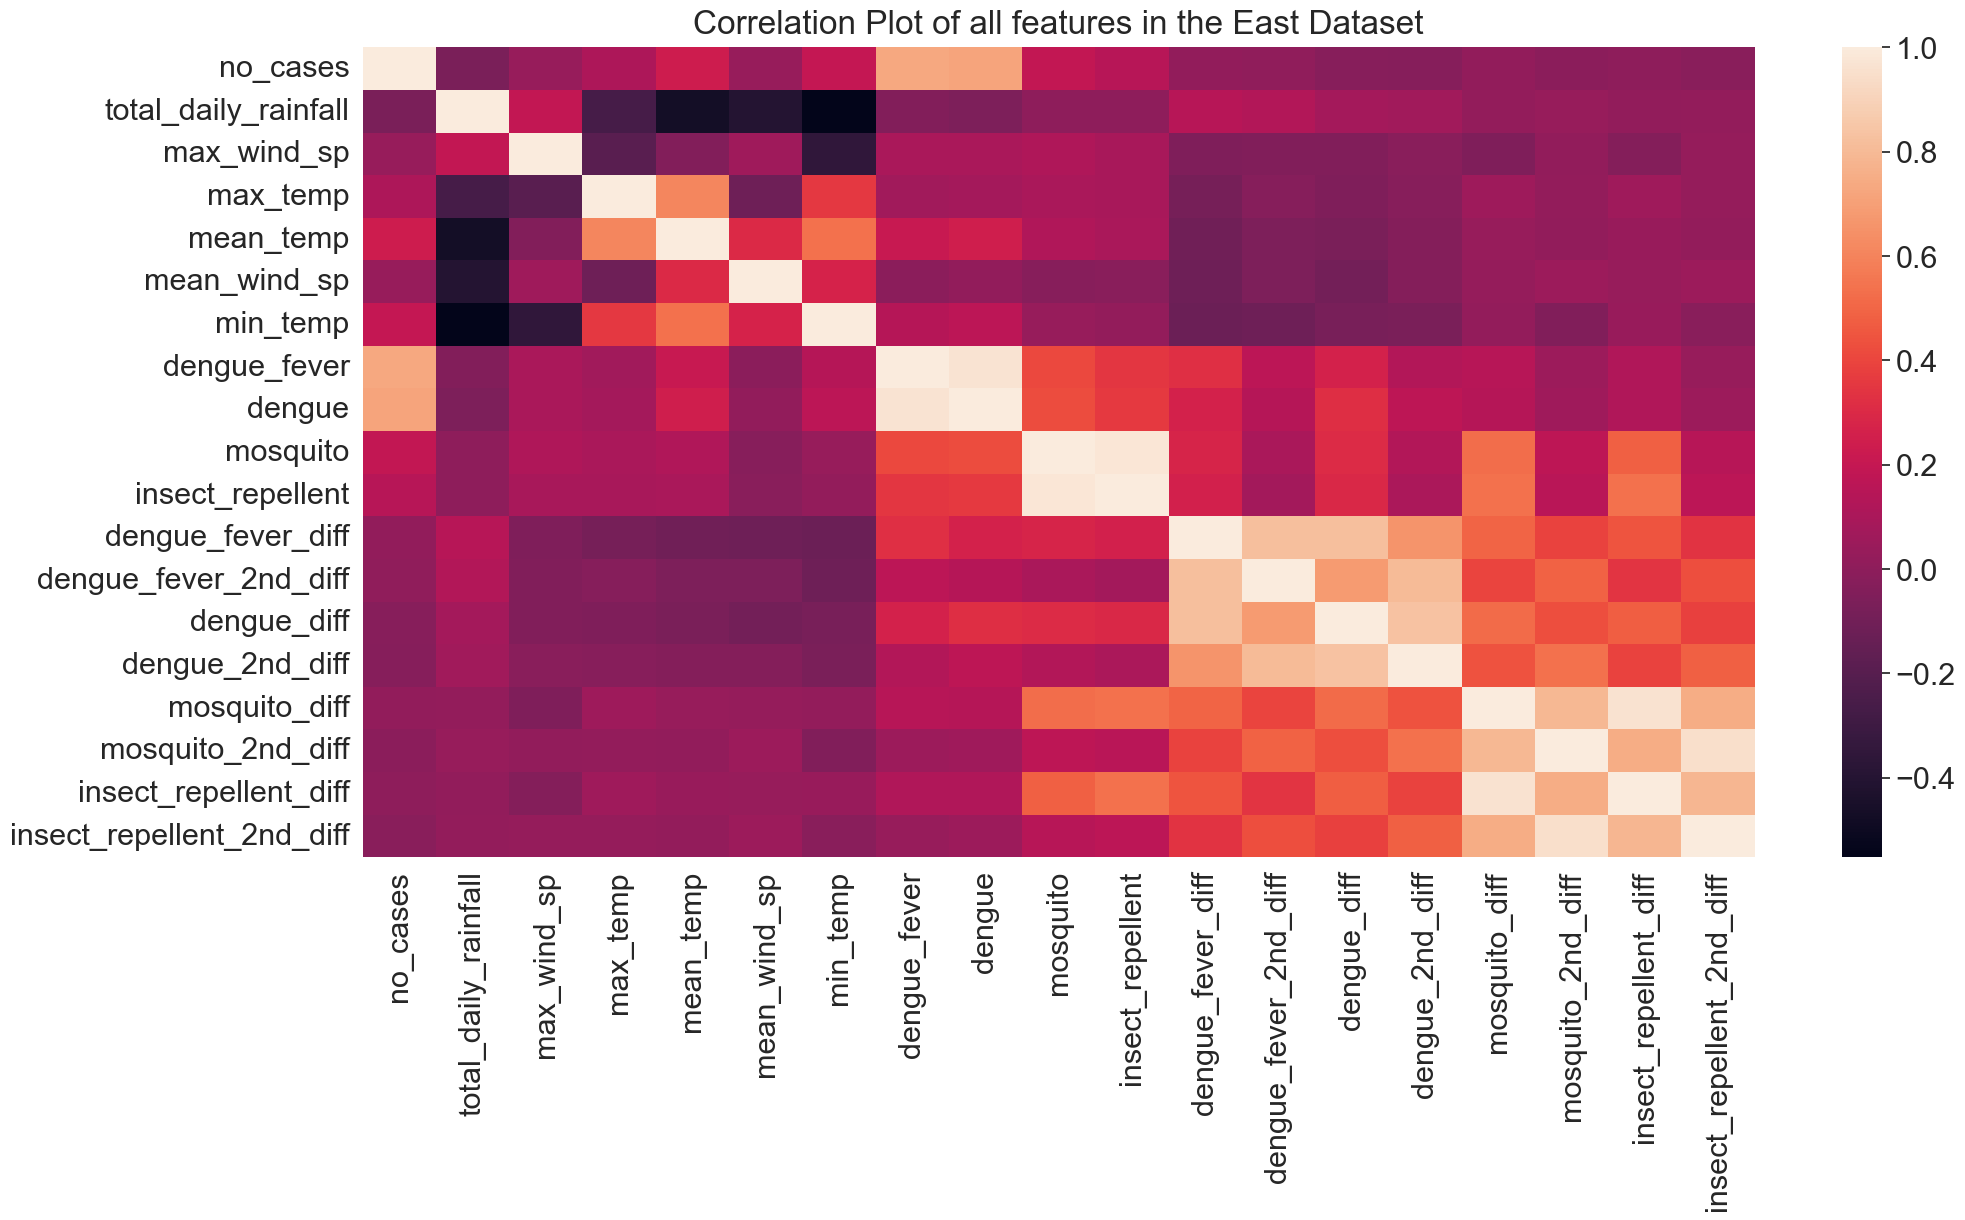

In [19]:
import seaborn as sns

df_east['no_cases'] = df_east['no_cases']

df_east_corr = df_east.corr()

sns.set(font_scale = 2)
plt.figure(figsize=(20, 10))

sns.heatmap(df_east_corr)
plt.title('Correlation Plot of all features in the East Dataset')
plt.show()

Text(0.5, 1.0, 'Correlation by sort values in the East Dataset')

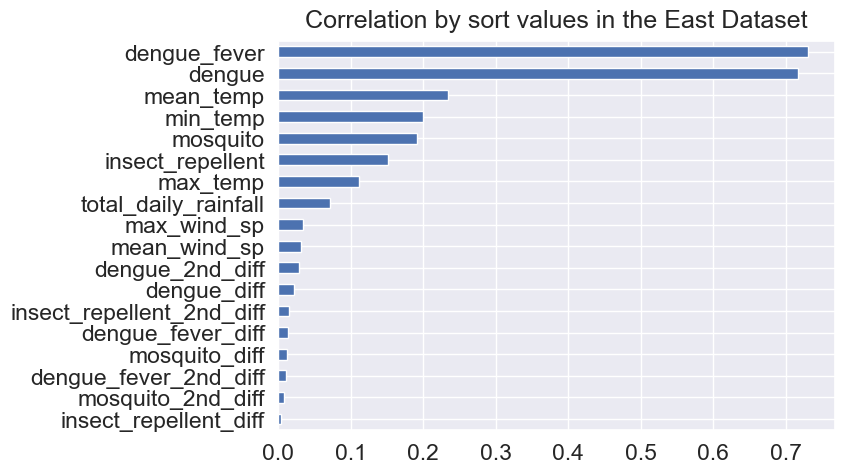

In [20]:
sns.set(font_scale = 1.5)
(abs(df_east_corr)
 .no_cases
 .drop('no_cases')
 .sort_values()
 .plot
 .barh())
plt.title('Correlation by sort values in the East Dataset')

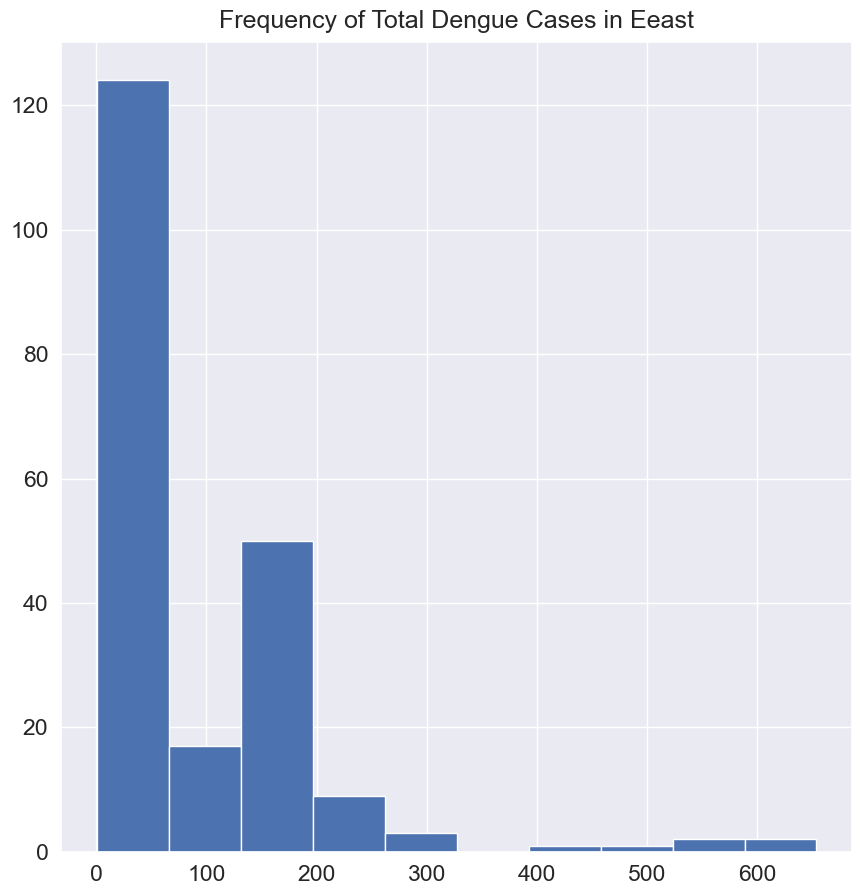

In [21]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.hist(df_east['no_cases'])
plt.title('Frequency of Total Dengue Cases in Eeast')


plt.show()


Train dates : 2015-01-04 00:00:00 --- 2017-12-31 00:00:00  (n=157)
Test dates  : 2018-01-07 00:00:00 --- 2018-12-30 00:00:00  (n=52)


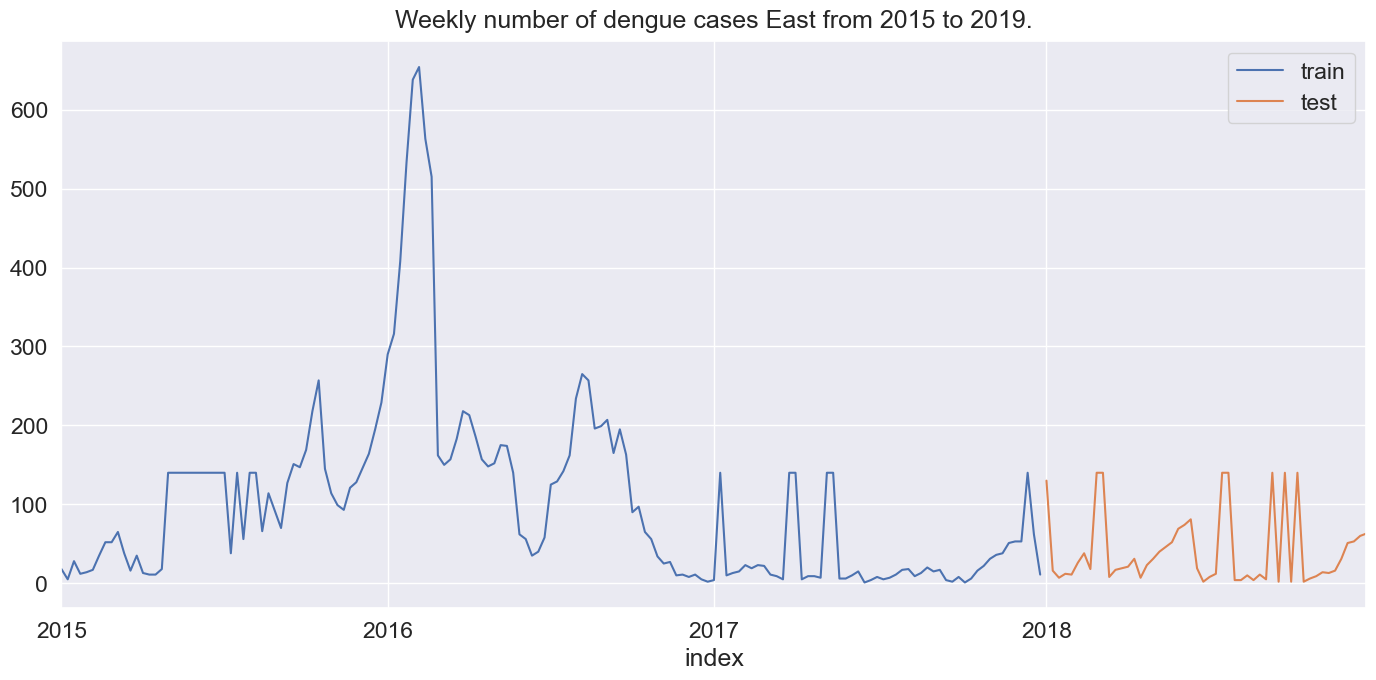

In [22]:
# Split data into train-test
# ==============================================================================
steps = 52
df_east_train = df_east[:-steps]
df_east_test  = df_east[-steps:]

print(f"Train dates : {df_east_train.index.min()} --- {df_east_train.index.max()}  (n={len(df_east_train)})")
print(f"Test dates  : {df_east_test.index.min()} --- {df_east_test.index.max()}  (n={len(df_east_test)})")

fig, ax = plt.subplots(figsize=(15, 7))
df_east_train['no_cases'].plot(ax=ax, label='train',title='Weekly number of dengue cases East from 2015 to 2019.')
df_east_test['no_cases'].plot(ax=ax, label='test')
ax.legend();

### Feature Selection and Processing

In [23]:
imptVar = abs(df_east_corr).no_cases.drop('no_cases').sort_values(ascending = False).index[0:4]

In [24]:
df_east_temp_train = df_east_train[imptVar] 
df_east_temp_test = df_east_test[imptVar]

In [25]:
df_east_temp_train['y'] =  df_east_train['no_cases'] 
df_east_temp_test['y'] = df_east_test['no_cases'] 

C:\Users\ngzen\AppData\Local\Temp\ipykernel_12040\2628828571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_east_temp_train['y'] =  df_east_train['no_cases']
C:\Users\ngzen\AppData\Local\Temp\ipykernel_12040\2628828571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_east_temp_test['y'] = df_east_test['no_cases']


#### Negative Binomial Regression Model

We attempt to find the best fitting Negative Binomial Model by tweaking the hyperparameter, alpha, between the range of 0.01 and 2.



In [26]:
imptVar

Index(['dengue_fever', 'dengue', 'mean_temp', 'min_temp'], dtype='object')

In [29]:
def best_nb_model(train, cv):
    formula = "y ~ 1 + dengue_fever + dengue + mean_temp + min_temp"
    alpha_grid = np.linspace(0.01, 2, 100)
    
    best_alpha = 0
    best_train_mae = 1000
    best_cv_mae = 1000
    
    for alpha in alpha_grid:
        model = smf.glm(formula=formula, data=train, 
                        family=sm.families.NegativeBinomial(alpha=alpha))
        nb_model = model.fit()
        
        cv_pred = np.array(list(map(int, map(round, nb_model.predict(cv))))) 
        cv_mae = eval_measures.meanabs(cv_pred, cv.y)
        
        train_pred = np.array(list(map(int, map(round, nb_model.predict(train))))) 
        train_mae = eval_measures.meanabs(train_pred, train.y)
        
        if cv_mae < best_cv_mae:
            best_cv_mae = cv_mae
            best_train_mae = train_mae
            best_alpha = alpha
            
    total = pd.concat([train, cv])
    
    print('Negative Binomial Model Train MAE:', best_train_mae)
    print('Negative Binomial Model Test MAE:', best_cv_mae)
    
    return smf.glm(formula=formula, data=total, 
                   family=sm.families.NegativeBinomial(alpha=best_alpha)).fit()

In [30]:
nb_model = best_nb_model(train=df_east_temp_train, cv=df_east_temp_test)

Negative Binomial Model Train MAE: 54.12738853503185
Negative Binomial Model Test MAE: 42.11538461538461


#### Linear Regression with L2 Regularization (Ridge)

In [31]:
def best_ridge_model(train, cv):
    ridge = Ridge(random_state=10)
    param_grid = {'alpha': np.logspace(-5, 3, 50)}
    
    model = GridSearchCV(ridge, param_grid, scoring='neg_mean_absolute_error', cv=10)
    
    X_var = imptVar
    ridgereg = model.fit(train[X_var], train.y)
        
    cv_pred = np.array(list(map(int, map(round, ridgereg.predict(cv[X_var])))))
    cv_mae = eval_measures.meanabs(cv_pred, cv.y)
    
    train_pred = np.array(list(map(int, map(round, ridgereg.predict(train[X_var])))))
    train_mae = eval_measures.meanabs(train_pred, train.y)

        
    print('Ridge Regression Model Train MAE:', train_mae)
    print('Ridge Regression Model Test MAE:', cv_mae)
    
    
    total = pd.concat([train, cv])
    return model.fit(total[X_var], total.y)

In [32]:
L2_model = best_ridge_model(train=df_east_temp_train, cv=df_east_temp_test)

Ridge Regression Model Train MAE: 52.97452229299363
Ridge Regression Model Test MAE: 38.80769230769231


#### Linear Regression with L1 Regularization (Lasso)

In [33]:
def best_lasso_model(train, cv):
    lasso = Lasso(random_state = 10)
    
    param_grid = {'alpha': np.logspace(-5, 3, 50), }
    
    model = GridSearchCV(lasso, param_grid, scoring = 'neg_mean_absolute_error', cv = 10)
    
    X_var = imptVar
    lassoreg = model.fit(train[X_var], train.y)
        
    cv_pred = np.array(list(map(int, map(round, lassoreg.predict(cv[X_var])))))
    mae = eval_measures.meanabs(cv_pred, cv.y)
    
    train_pred = np.array(list(map(int, map(round, lassoreg.predict(train[X_var])))))
    train_mae = eval_measures.meanabs(train_pred, train.y)
        
    total = pd.concat([train, cv])
    
    print('Lasso Regression Model Train MAE:', train_mae)
    print ('Lasso Regression Model Test MAE: ', mae)
    return model.fit(total[X_var], total.y)

In [34]:
L1_model = best_lasso_model(train=df_east_temp_train, cv=df_east_temp_test)

Lasso Regression Model Train MAE: 53.50955414012739
Lasso Regression Model Test MAE:  39.71153846153846


In [35]:
best_nb_model (train=df_east_temp_train, cv=df_east_temp_test)

best_ridge_model(train=df_east_temp_train, cv=df_east_temp_test)


best_lasso_model(train=df_east_temp_train, cv=df_east_temp_test)


Negative Binomial Model Train MAE: 54.12738853503185
Negative Binomial Model Test MAE: 42.11538461538461
Ridge Regression Model Train MAE: 52.97452229299363
Ridge Regression Model Test MAE: 38.80769230769231
Lasso Regression Model Train MAE: 53.50955414012739
Lasso Regression Model Test MAE:  39.71153846153846


GridSearchCV(cv=10, estimator=Lasso(random_state=10),
             param_grid={'alpha': array([1.00000000e-05, 1.45634848e-05, 2.12095089e-05, 3.08884360e-05,
       4.49843267e-05, 6.55128557e-05, 9.54095476e-05, 1.38949549e-04,
       2.02358965e-04, 2.94705170e-04, 4.29193426e-04, 6.25055193e-04,
       9.10298178e-04, 1.32571137e-03, 1.93069773e-03, 2.81176870e-03,
       4.09491506e-03, 5.96362332e-03, 8...
       3.72759372e-01, 5.42867544e-01, 7.90604321e-01, 1.15139540e+00,
       1.67683294e+00, 2.44205309e+00, 3.55648031e+00, 5.17947468e+00,
       7.54312006e+00, 1.09854114e+01, 1.59985872e+01, 2.32995181e+01,
       3.39322177e+01, 4.94171336e+01, 7.19685673e+01, 1.04811313e+02,
       1.52641797e+02, 2.22299648e+02, 3.23745754e+02, 4.71486636e+02,
       6.86648845e+02, 1.00000000e+03])},
             scoring='neg_mean_absolute_error')

It turns out that the Ridge Regression Model performs the best on West datasets.

In [36]:
best_East_model = best_ridge_model(train=df_east_temp_train, cv=df_east_temp_test)

Ridge Regression Model Train MAE: 52.97452229299363
Ridge Regression Model Test MAE: 38.80769230769231


In [37]:
predictions = best_East_model.predict(df_east_temp_test[imptVar])

In [38]:
# Calculate Mean Squared Error
mse = mean_squared_error(df_east_temp_test.y, predictions)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 3034.3298439592227
Root Mean Squared Error: 55.0847514649855


Text(0.5, 1.0, 'Prediction on the test set on the number of dengue cases in the Eastbase on Ridge Regression Model ')

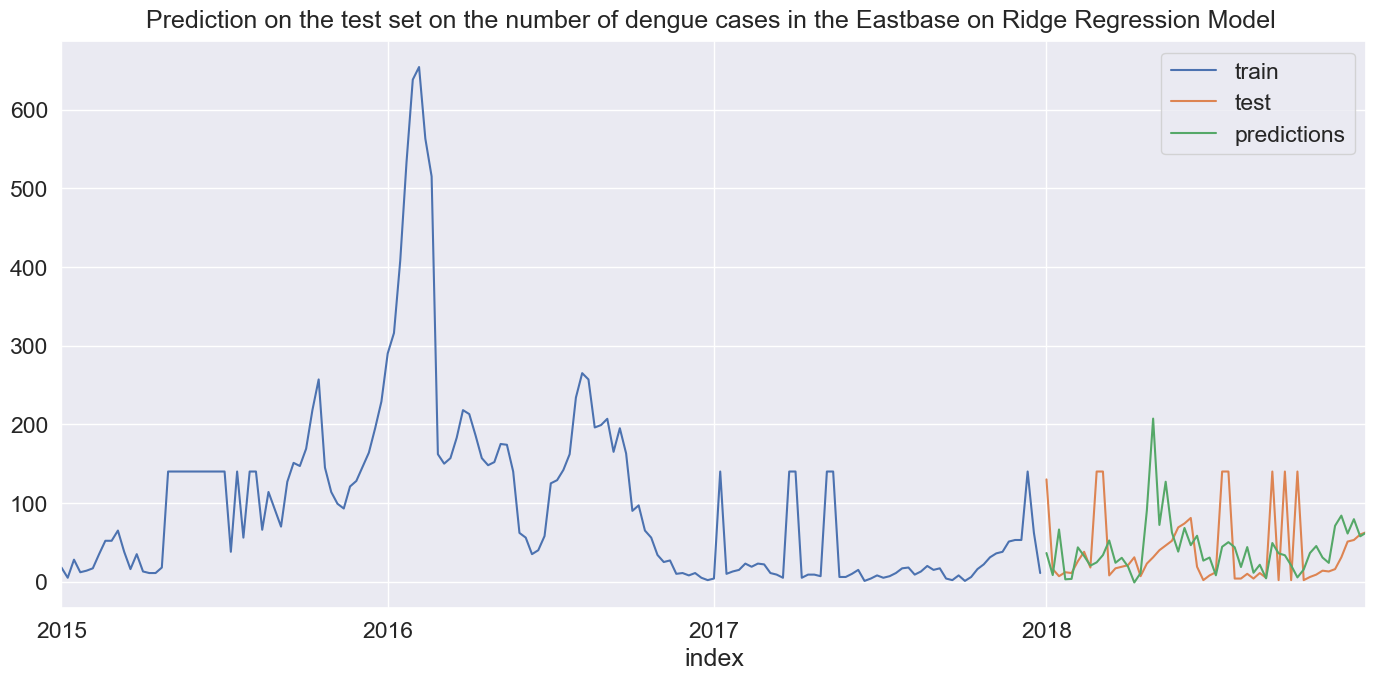

In [39]:
# Create a Pandas Series for predictions with the same index as the test dataset
predictions_series = pd.Series(predictions, index=df_east_temp_test.index, name='predictions')

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(15, 7))
df_east_train['no_cases'].plot(ax=ax, label='train')
df_east_test['no_cases'].plot(ax=ax, label='test')
predictions_series.plot(ax=ax, label='predictions')
ax.legend()
ax.set_xlim(df_east.index.min(), df_east.index.max())
plt.title('Prediction on the test set on the number of dengue cases in the Eastbase on Ridge Regression Model ')